<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

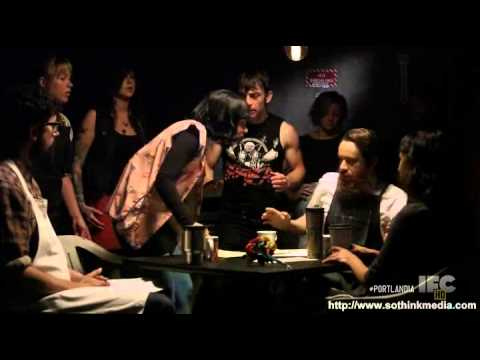

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\iulia\\Desktop\\Unit-4\\DS-Unit-4-Sprint-1-NLP-master\\module1-text-data'

In [220]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [221]:
# Start here
shops.shape

(7616, 3)

In [134]:
# shops['date'] = shops['full_review_text'].str.split(n=1).str[0]
# shops

In [222]:
shops.dtypes


coffee_shop_name    object
full_review_text    object
star_rating         object
dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [223]:
shops = shops.replace({'star_rating': {' 1.0 star rating ': 'bad', ' 2.0 star rating ': 'bad', ' 3.0 star rating ': 'bad', ' 4.0 star rating ': 'good', ' 5.0 star rating ': 'good'}})

In [224]:
shops['star_rating'].value_counts()

good    6140
bad     1476
Name: star_rating, dtype: int64

In [199]:
# shops['full_review_text'] = shops['full_review_text'].str.replace('\d+', '')
# shops

In [200]:
# shops['full_review_text'].value_counts(normalize=True)[:50]

In [225]:
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [226]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z ]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [227]:
shops['tok'] = shops['full_review_text'].apply(tokenize)
shops['tok'].head()

0    [checkin, love, love, loved, the, atmosphere, ...
1    [listed, in, date, night, austin, ambiance, in...
2    [checkin, listed, in, brunch, spots, i, loved,...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [checkin, they, are, located, within, the, nor...
Name: tok, dtype: object

In [228]:
# Tokenizer Pipe
tokenizer = Tokenizer(nlp.vocab)

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [229]:
# I wanted to see spacy.tokenizer vs. tokenize function
shops

,coffee_shop_name,full_review_text,star_rating,tok,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,good,"[checkin, love, love, loved, the, atmosphere, ...","[ , 11/25/2016, 1, check-in, Love, love, loved..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",good,"[listed, in, date, night, austin, ambiance, in...","[ , 12/2/2016, Listed, in, Date, Night:, Austi..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,good,"[checkin, listed, in, brunch, spots, i, loved,...","[ , 11/30/2016, 1, check-in, Listed, in, Brunc..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,bad,"[very, cool, decor, good, drinks, nice, seatin...","[ , 11/25/2016, Very, cool, decor!, Good, drin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,good,"[checkin, they, are, located, within, the, nor...","[ , 12/3/2016, 1, check-in, They, are, located..."
...,...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,good,"[i, actually, step, into, this, restaurant, by...","[ , 2/19/2015, I, actually, step, into, this, ..."
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",good,"[ok, the, steeping, room, is, awesome, how, do...","[ , 1/21/2016, Ok,, The, Steeping, Room, IS, a..."
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",good,"[loved, coming, here, for, tea, and, the, atmo...","[ , 4/30/2015, Loved, coming, here, for, tea,,..."
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,bad,"[the, food, is, just, average, the, booths, di...","[ , 8/2/2015, The, food, is, just, average., T..."


In [230]:
from collections import Counter

# Print out the 10 most common words after using tokanizer  function
word_counts = Counter()
shops['tok'].apply(lambda x: word_counts.update(x))
word_counts.most_common(10)

[('the', 34809),
 ('and', 26651),
 ('a', 22756),
 ('i', 20249),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10354),
 ('was', 9707),
 ('in', 9546)]

In [231]:
from collections import Counter
 
# Print out the 10 most common words after using spacy.tokanizer 
word_counts = Counter()
shops['tokens'].apply(lambda x: word_counts.update(x))
word_counts.most_common(10)

[('the', 27779),
 ('and', 25748),
 (' ', 22606),
 ('a', 22085),
 ('I', 19780),
 ('to', 16904),
 ('of', 12495),
 ('is', 11748),
 ('was', 9539),
 ('in', 8901)]

In [234]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens


In [237]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
#         wc = wc.sort_values(by='rank')
#         wc['cul_pct_total'] = wc['pct_total'].cumsum()

#         t2 = zip(appears_in.keys(), appears_in.values())
#         ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
#         wc = ac.merge(wc, on='word')

#         wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [238]:
wc = count(shops['tokens'])
wc.head()

,word,count,rank,pct_total
0,,22606,1.0,0.053592
8,coffee,8058,2.0,0.019103
84,place,4264,3.0,0.010109
149,great,3250,4.0,0.007705
251,it's,3117,5.0,0.007389


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [239]:
bad_coffee = shops[shops['star_rating'] == 'bad'].copy()
good_coffee = shops[shops['star_rating'] == 'good'].copy()


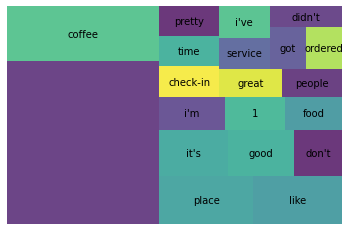

In [240]:
bc = count(bad_coffee['tokens'])
bc.head()

bc_top20 = bc[bc['rank'] <= 20]

squarify.plot(sizes=bc_top20['pct_total'], label=bc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

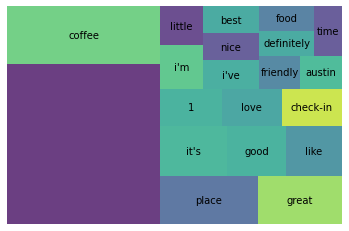

In [241]:
gc = count(good_coffee['tokens'])
gc.head()

gc_top20 = gc[gc['rank'] <= 20]

squarify.plot(sizes=gc_top20['pct_total'], label=gc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [249]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ',"i've", 'i', 'coffee', "it's", '1', "i'm", '-', 'check-in', 'it.', 'coffee.', 'check-ins', 'place'])

In [250]:
##Bad coffee place
tokens = []

for doc in tokenizer.pipe(bad_coffee['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
bad_coffee['tokens'] = tokens

In [251]:
##Good coffee place
tokens = []

for doc in tokenizer.pipe(good_coffee['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
good_coffee['tokens'] = tokens

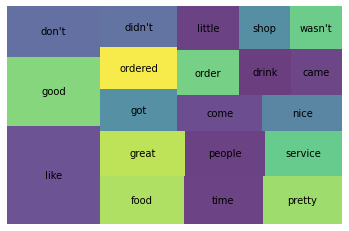

In [252]:
bc = count(bad_coffee['tokens'])
bc.head()

bc_top20 = bc[bc['rank'] <= 20]

squarify.plot(sizes=bc_top20['pct_total'], label=bc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [255]:
bc = count(bad_coffee['tokens'])
bc.head()

,word,count,rank,pct_total
34,like,834,1.0,0.009998
3,good,599,2.0,0.007181
211,don't,430,3.0,0.005155
61,food,369,4.0,0.004424
222,time,351,5.0,0.004208


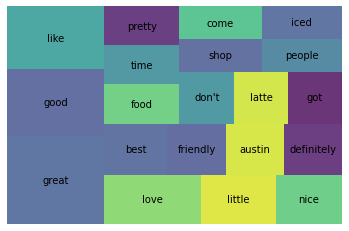

In [253]:
gc = count(good_coffee['tokens'])
gc_top20 = gc[gc['rank'] <= 20]

squarify.plot(sizes=gc_top20['pct_total'], label=gc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [254]:
gc = count(good_coffee['tokens'])
gc.head()

,word,count,rank,pct_total
144,great,2902,1.0,0.009935
314,good,2180,2.0,0.007464
241,like,2068,3.0,0.007080
1,love,1604,4.0,0.005492
604,little,1230,5.0,0.004211


In [256]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [257]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [258]:
shops['lemmas'].head()

0    [ , 11/25/2016, 1, check, Love, love, love, at...
1    [ , 12/2/2016, list, Date, Night, Austin, Ambi...
2    [ , 11/30/2016, 1, check, list, Brunch, Spots,...
3    [ , 11/25/2016, cool, decor, good, drink, nice...
4    [ , 12/3/2016, 1, check, locate, Northcross, m...
Name: lemmas, dtype: object

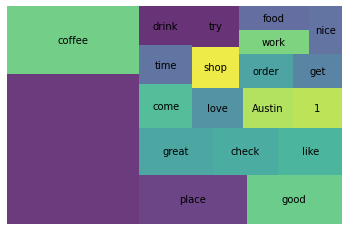

In [259]:
all_shops = count(shops['lemmas'])
all_top20 = all_shops[all_shops['rank'] <= 20]

squarify.plot(sizes=all_top20['pct_total'], label=all_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

